<a href="https://colab.research.google.com/github/god-konw/magincan-s-home/blob/master/3_Pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
from google.colab import drive
drive.mount('/content/drive', force_remount=True) 

Mounted at /content/drive


In [2]:
path = 'drive/MyDrive/Colab Notebooks/'

In [3]:
import numpy as np  # for array
import pandas as pd  # for csv files and dataframe
import matplotlib.pyplot as plt  # for plotting
import seaborn as sns  # plotting

from prettytable import PrettyTable  # To print in tabular format

import pickle
from sklearn.model_selection import train_test_split
# Different Models
from sklearn.linear_model import LogisticRegression  # LR
from sklearn.svm import LinearSVC  # SVM
from sklearn.tree import DecisionTreeClassifier  #DT
from sklearn.ensemble import RandomForestClassifier  # RF
import xgboost as xgb  #XGB

from sklearn.metrics import accuracy_score, confusion_matrix, make_scorer  # Scoring functions
from sklearn.metrics import auc, f1_score, roc_curve, roc_auc_score  # Scoring fns
from sklearn.metrics import precision_score, recall_score, roc_auc_score, f1_score, roc_curve, accuracy_score, auc, confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV  # Cross validation
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics 

%matplotlib inline

In [4]:
test = pd.read_csv(path+'datasets/t2_test.csv')

In [33]:
result_dict = {"Model":[], "AUC":[], "F1-score":[], "Recall":[], "Precision":[], "Accuracy":[]}

In [51]:
def false_alarm_rate(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    FPR = fp / (fp + tn)  # False positive rate
    FNR = fn / (fn + tp)  # False negetive rate
    return (FPR+FNR)/2  # False alarm rate

In [12]:
def final(model_name, X, Y):
    y_true = Y.copy()
    y_pred = X 

    # auc curve
    fpr, tpr, _ = roc_curve(y_true, y_pred)
    
    # Confusion, precison and recall matrix
    C = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = C.ravel()
  #  FPR = fp / (fp + tn)
  #  FNR = fn / (fn + tp)
 
    P = (C/C.sum(axis=0))   #tp/(tp+fp)
    R =(((C.T)/(C.sum(axis=1))).T) #tp/(tp+fn)
   # A = np.sum(np.diag(C))/C.sum()  #(tp + tn)/(tp + tn + fp + fn)

    # Scores of test dataset
    y_auc = auc(fpr, tpr)
    y_f1 = f1_score(y_true, y_pred)
    y_recall = recall_score(y_true, y_pred)
    y_precision = precision_score(y_true, y_pred)
    y_accuracy = accuracy_score(y_true, y_pred)
    #y_far = (FPR+FNR)/2  # False alarm rate

    # return finall socres to result_dict
    result_dict['Model'].append(model_name)
    result_dict['AUC'].append(y_auc)
    result_dict['F1-score'].append(y_f1)
    result_dict['Recall'].append(y_recall)
    result_dict['Precision'].append(y_precision)
    result_dict['Accuracy'].append(y_accuracy)
    #result_dict['FAR'].append(y_far)

    # Printing the result as a table
    x = PrettyTable()
    x.field_names = ['AUC', 'F1-score', 'Recall', 'Precision', 'Accuracy']
    x.add_row([y_auc
               , y_f1
               ,y_recall
               ,y_precision
               ,y_accuracy
               #, y_far
               ])
    print(x)

    # Plotting AUC curve
    plt.figure(figsize=(12, 5))
    plt.plot(fpr, tpr, color='r', label=f"AUC: {y_auc}")
    plt.grid()
    plt.legend()
 #   plt.savefig(path+f"/pic/{model_name}_pred_auc_curve.png")
    plt.show()

    # Plotting Confusion, Precision, Recall Matrix
    labels= ['normal', 'malicious']
    # Confusion
    plt.figure(figsize=(18,5))
    plt.subplot(1,4,1)
    sns.heatmap(C, annot=True, cmap="Blues", fmt='d', xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.savefig(path+f"/pic/{model_name}_pred_Confusion_Matrix.png")
    # Precision
    plt.subplot(1,4,2)
    sns.heatmap(P, annot=True, cmap="Greens", fmt='.3f', xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Precision Matrix")
    plt.savefig(path+f"/pic/{model_name}_pred_Precision_Matrix.png")
    # Recall
    plt.subplot(1,4,3)
    sns.heatmap(R, annot=True, cmap="BuPu", fmt='.3f', xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Recall Matrix") 
    plt.savefig(path+f"/pic/{model_name}_pred_Recall_Matrix.png")
    # Accuracy
   # plt.subplot(1,4,4)
   # sns.heatmap(np.array([[A]]), annot=True, cmap="Reds", fmt='.3f', xticklabels=labels, yticklabels=labels)
   # plt.xlabel("Predicted")
   # plt.ylabel("Actual")
   # plt.title("Accuracy Matrix") 
   # plt.savefig(path+f"/pic/{model_name}_pred_Accuracy_Matrix.png")
    plt.show()
    
    # Retuning performance metrices
    return y_auc, y_f1, y_recall, y_precision, y_accuracy

In [7]:
x_test, y_test = test.drop(columns=['label']), test['label']

In [8]:
x_test.shape

(82332, 175)

In [22]:
lr_model = pickle.load(open(path+'/models/LR_clf.pkl', 'rb'))
dt_model = pickle.load(open(path+'/models/dt_clf.pkl', 'rb'))
svm_model = pickle.load(open(path+'/models/svm_clf.pkl', 'rb'))
xgb_model = pickle.load(open(path+'/models/xgb_clf.pkl', 'rb'))
rf_model = pickle.load(open(path+'/models/rf_clf.pkl', 'rb'))

EOFError: ignored

In [48]:
v_clf_auc = pickle.load(open(path+'models/v_clf_auc.pkl', 'rb'))
v_clf_all = pickle.load(open(path+'models/v_clf_all.pkl', 'rb'))
v_clf_all_auc2 = pickle.load(open(path+'models/v_clf_all_auc2.pkl', 'rb'))

In [54]:
accuracy_score(y_test,dt_model.predict(x_test))

0.7792595831511442

In [44]:
accuracy_score(y_test,lr_model.predict(x_test))

0.804802506923189

In [105]:
y_test.shape

(82332,)

In [75]:
del result_dict

+--------------------+--------------------+--------------------+--------------------+-------------------+
|        AUC         |      F1-score      |       Recall       |     Precision      |      Accuracy     |
+--------------------+--------------------+--------------------+--------------------+-------------------+
| 0.8592300225776835 | 0.8549794199176797 | 0.9374490144996185 | 0.7858466425483103 | 0.853216246416946 |
+--------------------+--------------------+--------------------+--------------------+-------------------+


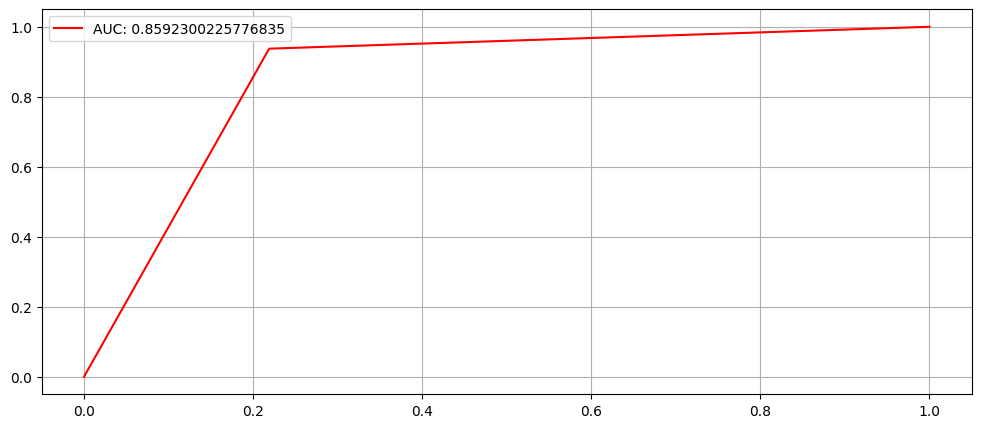

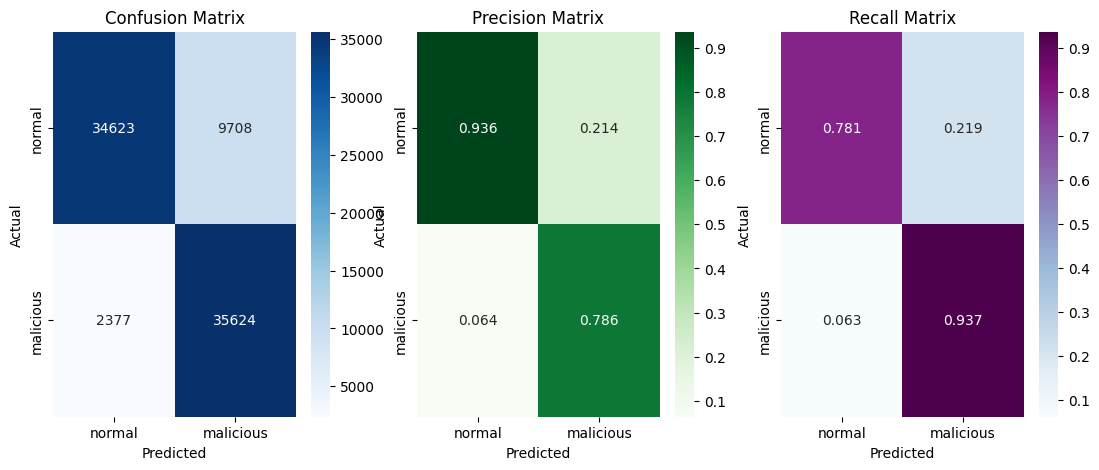

(0.8592300225776835,
 0.8549794199176797,
 0.9374490144996185,
 0.7858466425483103,
 0.853216246416946)

In [44]:
final('LR',y_test,lr_model.predict(x_test))

+--------------------+--------------------+--------------------+--------------------+--------------------+
|        AUC         |      F1-score      |       Recall       |     Precision      |      Accuracy      |
+--------------------+--------------------+--------------------+--------------------+--------------------+
| 0.7747868431538627 | 0.8041088295902677 | 0.7646368392782541 | 0.8478778787611401 | 0.7725428751882621 |
+--------------------+--------------------+--------------------+--------------------+--------------------+


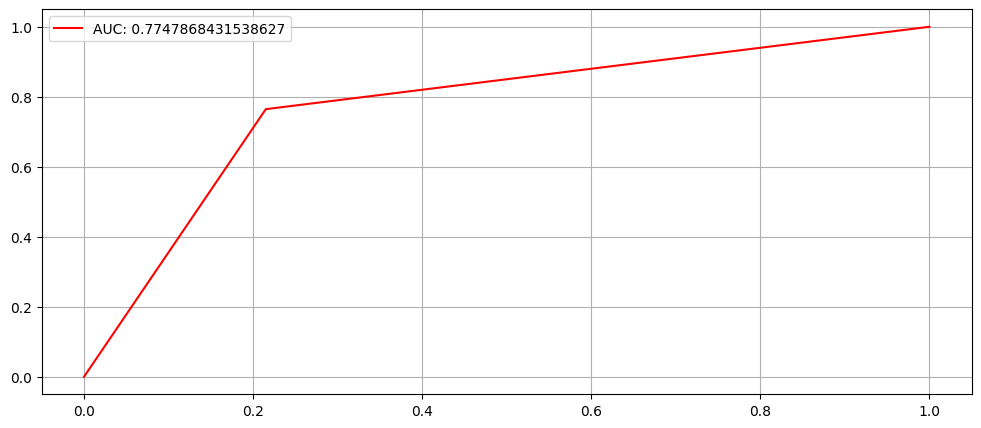

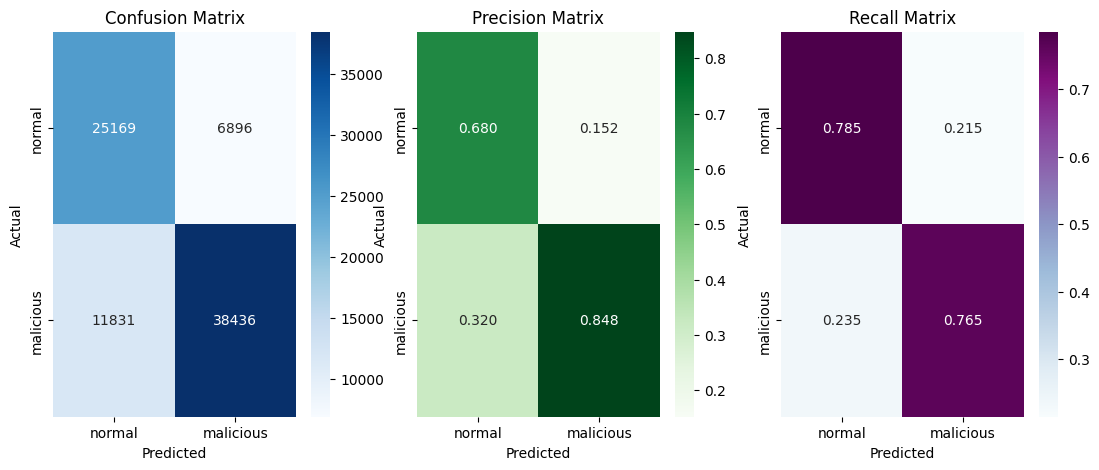

(0.7747868431538627,
 0.8041088295902677,
 0.7646368392782541,
 0.8478778787611401,
 0.7725428751882621)

In [43]:
final('DT', y_test,dt_model.predict(x_test))

+--------------------+--------------------+-------------------+--------------------+--------------------+
|        AUC         |      F1-score      |       Recall      |     Precision      |      Accuracy      |
+--------------------+--------------------+-------------------+--------------------+--------------------+
| 0.8238219219873337 | 0.8016067674441886 | 0.926229034123771 | 0.7065428394952793 | 0.8074381771364718 |
+--------------------+--------------------+-------------------+--------------------+--------------------+


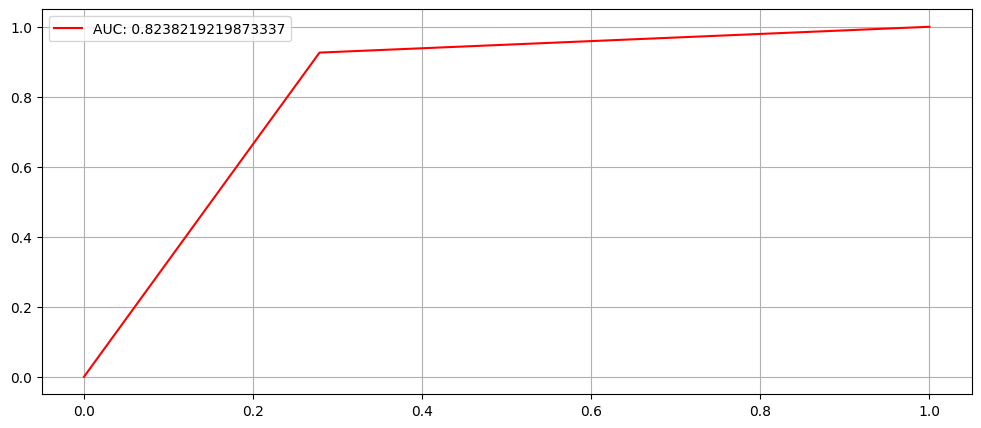

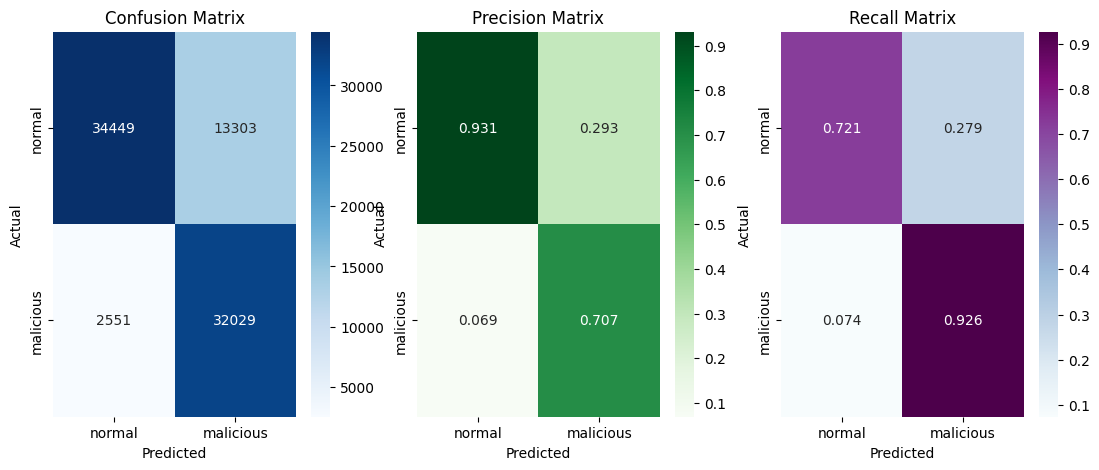

(0.8238219219873337,
 0.8016067674441886,
 0.926229034123771,
 0.7065428394952793,
 0.8074381771364718)

In [42]:
final('SVM',y_test, svm_model.predict(x_test))

+--------------------+--------------------+--------------------+--------------------+--------------------+
|        AUC         |      F1-score      |       Recall       |     Precision      |      Accuracy      |
+--------------------+--------------------+--------------------+--------------------+--------------------+
| 0.7783771077512026 | 0.8073891525285647 | 0.7498581318806038 | 0.8744816024000706 | 0.7702715833454793 |
+--------------------+--------------------+--------------------+--------------------+--------------------+


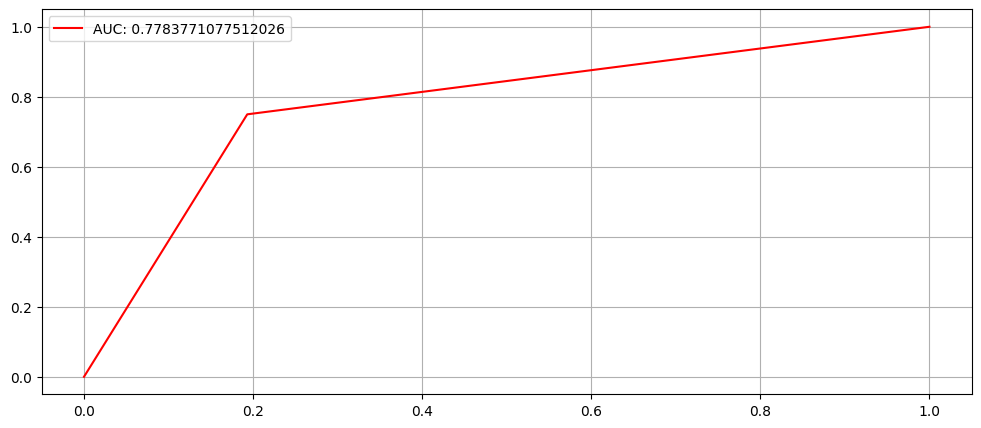

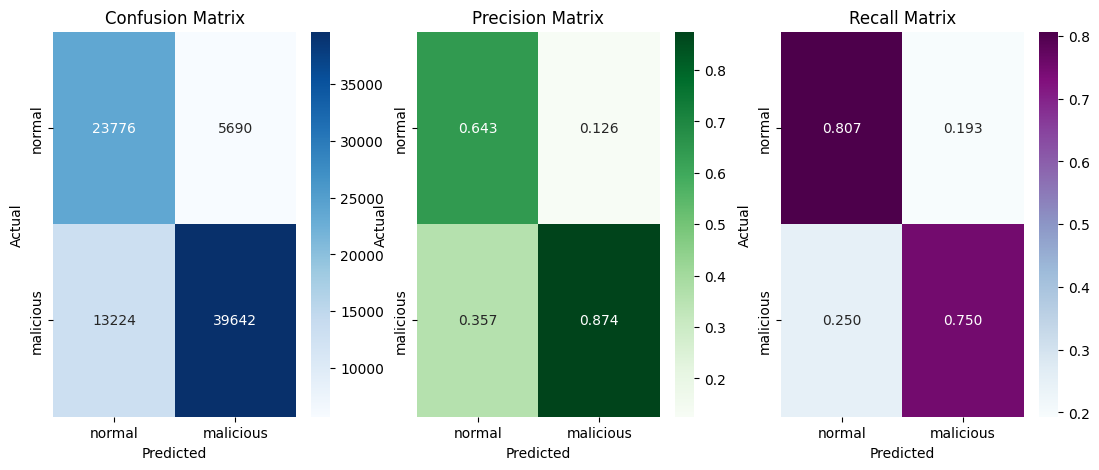

(0.7783771077512026,
 0.8073891525285647,
 0.7498581318806038,
 0.8744816024000706,
 0.7702715833454793)

In [37]:
final('XGB',y_test, xgb_model.predict(x_test))

+--------------------+--------------------+--------------------+--------------------+-------------------+
|        AUC         |      F1-score      |       Recall       |     Precision      |      Accuracy     |
+--------------------+--------------------+--------------------+--------------------+-------------------+
| 0.8705710769089426 | 0.8528630377027867 | 0.7443022988127733 | 0.9984999558810553 | 0.810304620317738 |
+--------------------+--------------------+--------------------+--------------------+-------------------+


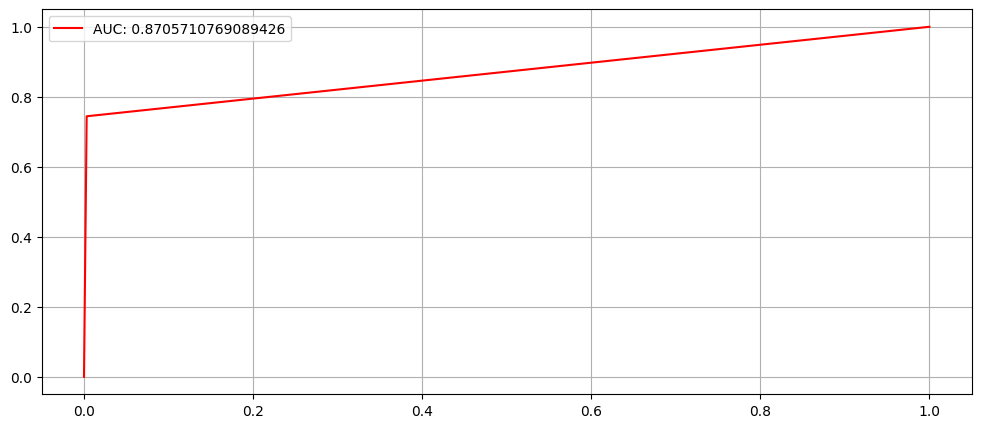

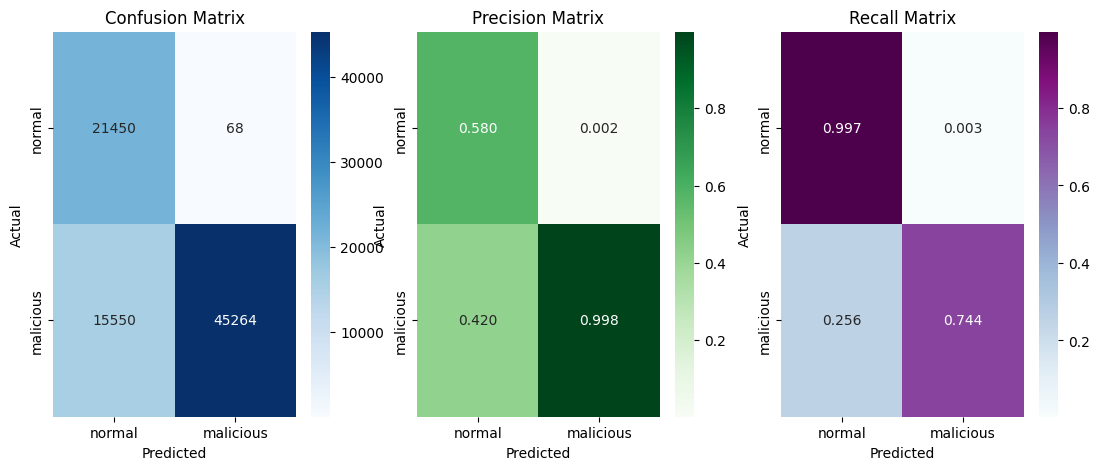

(0.8705710769089426,
 0.8528630377027867,
 0.7443022988127733,
 0.9984999558810553,
 0.810304620317738)

In [36]:
final('RF',y_test, rf_model.predict(x_test))

+--------------------+--------------------+--------------------+--------------------+--------------------+
|        AUC         |      F1-score      |       Recall       |     Precision      |      Accuracy      |
+--------------------+--------------------+--------------------+--------------------+--------------------+
| 0.8074785357877149 | 0.8278833561595905 | 0.7569973856926087 | 0.9134165710756199 | 0.7908832531700918 |
+--------------------+--------------------+--------------------+--------------------+--------------------+


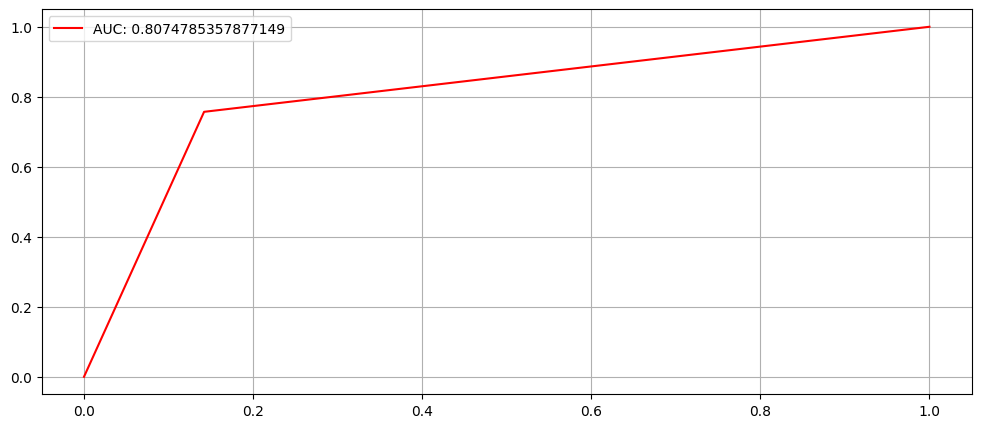

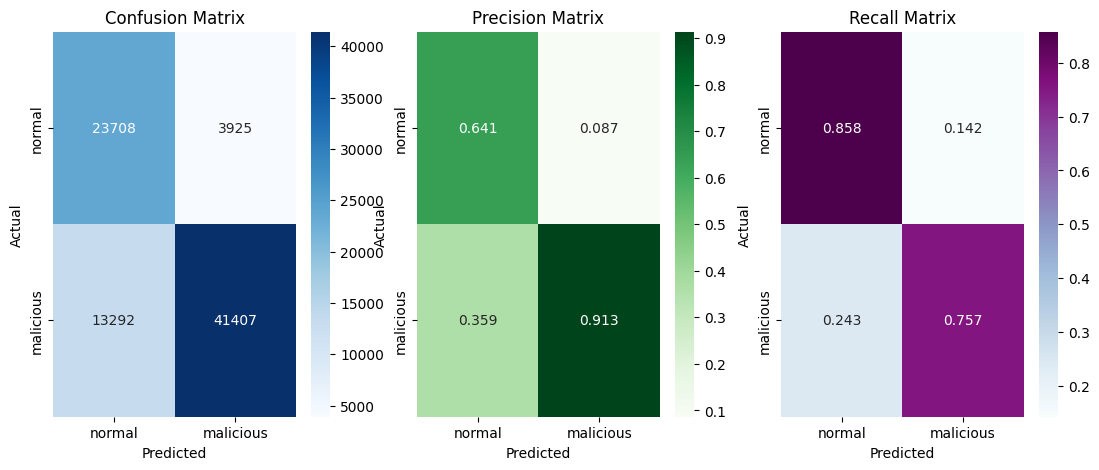

(0.8074785357877149,
 0.8278833561595905,
 0.7569973856926087,
 0.9134165710756199,
 0.7908832531700918)

In [35]:
final('Voting_auc',y_test, v_clf_auc.predict(x_test))

+--------------------+--------------------+--------------------+--------------------+--------------------+
|        AUC         |      F1-score      |       Recall       |     Precision      |      Accuracy      |
+--------------------+--------------------+--------------------+--------------------+--------------------+
| 0.8140679659270788 | 0.8321317613319527 | 0.7584222754664924 | 0.9217109326744904 | 0.7952436476704077 |
+--------------------+--------------------+--------------------+--------------------+--------------------+


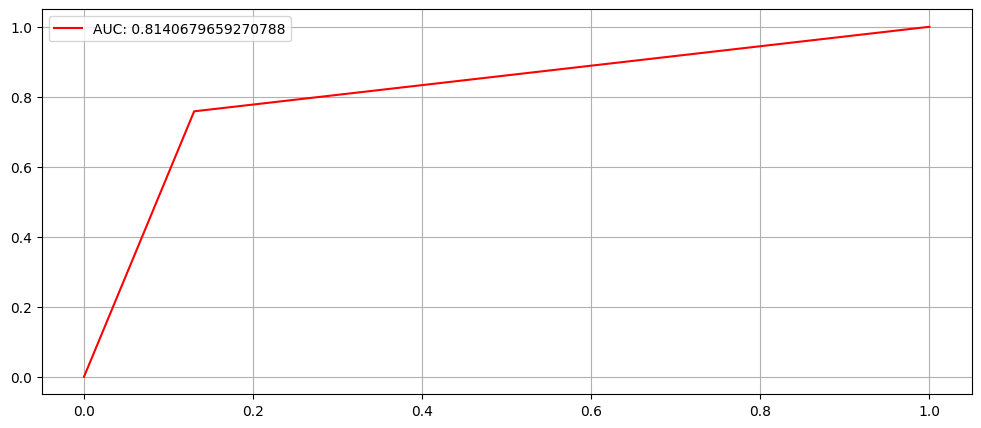

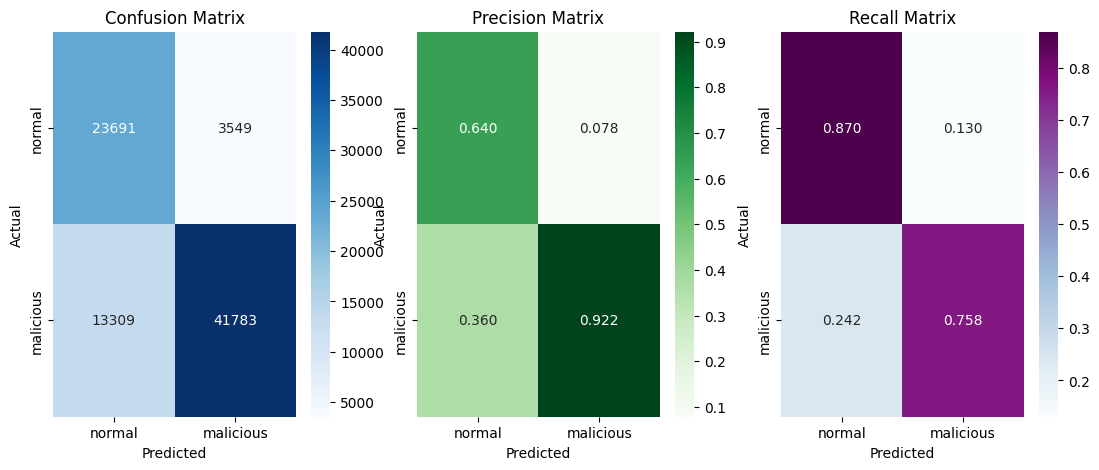

(0.8140679659270788,
 0.8321317613319527,
 0.7584222754664924,
 0.9217109326744904,
 0.7952436476704077)

In [39]:
final('Voting_all',y_test, v_clf_all.predict(x_test))

+--------------------+--------------------+--------------------+--------------------+--------------------+
|        AUC         |      F1-score      |       Recall       |     Precision      |      Accuracy      |
+--------------------+--------------------+--------------------+--------------------+--------------------+
| 0.8145853790628612 | 0.8324556775535801 | 0.7585124716553288 | 0.9223727168446131 | 0.7955715882038575 |
+--------------------+--------------------+--------------------+--------------------+--------------------+


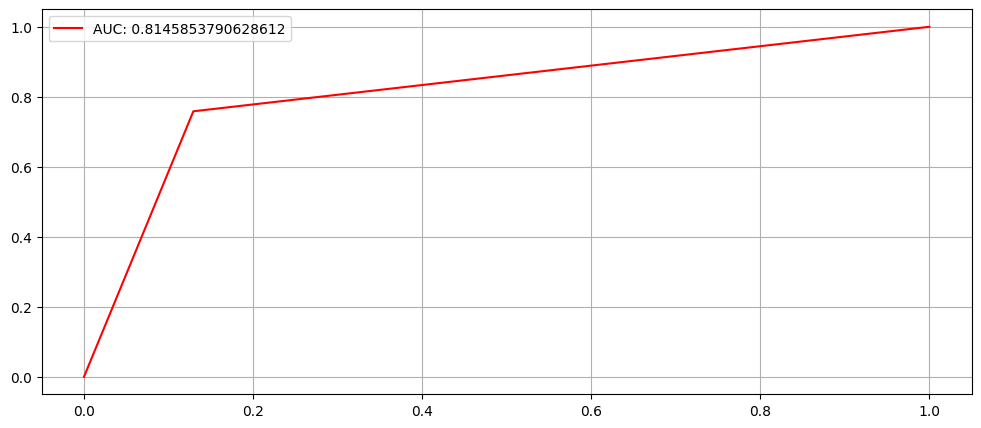

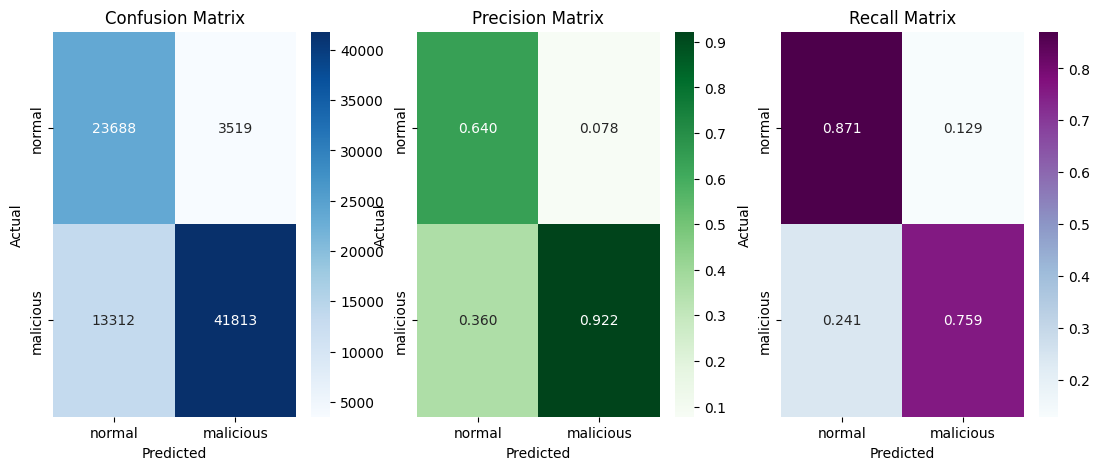

(0.8145853790628612,
 0.8324556775535801,
 0.7585124716553288,
 0.9223727168446131,
 0.7955715882038575)

In [49]:
final('Voting_all_auc2',y_test, v_clf_all_auc2.predict(x_test))

In [50]:
df = pd.DataFrame(result_dict)

In [51]:
df

,Model,AUC,F1-score,Recall,Precision,Accuracy
0,Voting_auc,0.807479,0.827883,0.756997,0.913417,0.790883
1,RF,0.870571,0.852863,0.744302,0.998500,0.810305
2,XGB,0.778377,0.807389,0.749858,0.874482,0.770272
3,Voting_all,0.814068,0.832132,0.758422,0.921711,0.795244
4,SVM,0.823822,0.801607,0.926229,0.706543,0.807438
5,DT,0.774787,0.804109,0.764637,0.847878,0.772543
6,LR,0.859230,0.854979,0.937449,0.785847,0.853216
7,Voting_all_auc2,0.814585,0.832456,0.758512,0.922373,0.795572


In [32]:
del result_dict